In [154]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

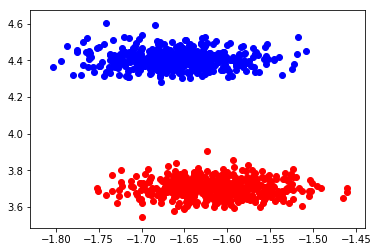

In [155]:
# make linear separated data
X, y = make_blobs(n_samples=1000, n_features=10, centers=2, cluster_std=0.05, random_state=1)
y[y == 0] = -1

plt.scatter(x=X[y < 0, 0], y=X[y < 0, 1], color= 'blue')
plt.scatter(x=X[y > 0, 0], y=X[y > 0, 1], color= 'red')

In [156]:
def svm_sgd(X, y, eta=.5, epochs=10):
    """ 
    svm sgd with hinge loss gradient
    
    X -- features 
    y -- labels (-1/+1)
    
    regularization lambda = 1 / epoch_i (decay)
    
    source: 
    https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/
    """
    
    w = np.zeros(X.shape[1])
    for epoch in range(1, epochs):
        for i, x in enumerate(X):
            if (y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * y[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + eta * (-2  *(1/epoch)* w)

    return w


In [158]:
w = svm_sgd(X, y)
np.all(np.sign(X.dot(w)) == y), w

(True, array([ 0.0729972 , -0.33876599,  1.18010713,  2.19065395, -0.08269739,
         2.38977842,  1.10051302,  0.88534053, -0.79531719, -1.22460351]))